In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 2: Extract the zip files
import zipfile
import os

# Paths to your zip files
zip_path_1 = '/content/drive/My Drive/ecomm-multi-2019-Oct.zip'
zip_path_2 = '/content/drive/My Drive/2019-Nov.csv.zip'
extract_path = '/content/datasets'

# Create a directory to extract the datasets
os.makedirs(extract_path, exist_ok=True)

# Extract the first zip file
with zipfile.ZipFile(zip_path_1, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Extract the second zip file
with zipfile.ZipFile(zip_path_2, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files
extracted_files = os.listdir(extract_path)
print(f'Extracted files: {extracted_files}')

Extracted files: ['ecomm-multi-2019-Oct.csv', '2019-Nov.csv', '__MACOSX']


In [3]:
# Assuming the extracted files are '2019-Oct.csv' and '2019-Nov.csv'
csv_file_1 = os.path.join(extract_path, 'ecomm-multi-2019-Oct.csv')
csv_file_2 = os.path.join(extract_path, '2019-Nov.csv')

In [4]:
# Step 3: Load the datasets using pandas
import pandas as pd

if os.path.isfile(csv_file_1):
    df1 = pd.read_csv(csv_file_1)

In [5]:
if os.path.isfile(csv_file_2):
  df2 = pd.read_csv(csv_file_2)

KeyboardInterrupt: 

In [ ]:
# Step 4: Filter the appliances category
appliances_df1 = df1[df1['category_code'].str.startswith('appliances', na=False)]

In [ ]:
appliances_df2 = df2[df2['category_code'].str.startswith('appliances', na=False)]

In [ ]:
# Step 5: Combine the datasets
combined_df = pd.concat([appliances_df1, appliances_df2], ignore_index=True)

# Display the combined dataframe
print(combined_df.head())

In [20]:
  combined_df.to_csv('/content/drive/My Drive/combined_appliances_data.csv', index=False)


In [21]:
 print(combined_df.sample(n=20))

                       event_time event_type  product_id          category_id  \
12244414  2019-11-24 14:46:08 UTC       view     4501564  2053013563877884791   
8169079   2019-11-15 04:39:46 UTC       view     3701056  2053013565983425517   
11895009  2019-11-22 15:13:26 UTC       view    12600113  2053013554751078769   
6697628   2019-11-10 03:12:58 UTC       view     3800985  2053013566176363511   
5694532   2019-11-05 03:50:55 UTC       view     3700926  2053013565983425517   
5767758   2019-11-05 10:54:00 UTC       view     3700766  2053013565983425517   
11491658  2019-11-20 09:26:36 UTC       view     4500360  2053013563877884791   
6901660   2019-11-10 18:53:49 UTC       view     2700901  2053013563835941749   
2782251   2019-10-18 04:31:35 UTC       view     6200557  2053013552293216471   
1485701   2019-10-11 04:49:55 UTC       view    34900004  2069241409453425602   
12544529  2019-11-26 10:10:18 UTC       view     3601479  2053013563810775923   
11362411  2019-11-19 14:25:2

In [23]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Clean the dataset: handle missing values
df = combined_df.dropna(subset=['category_code', 'user_id', 'event_type'])



In [27]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

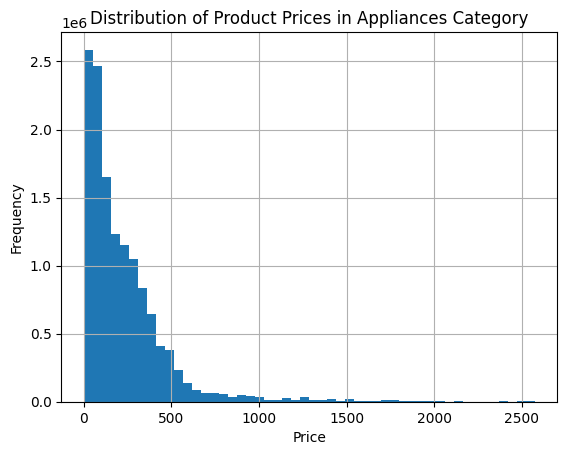

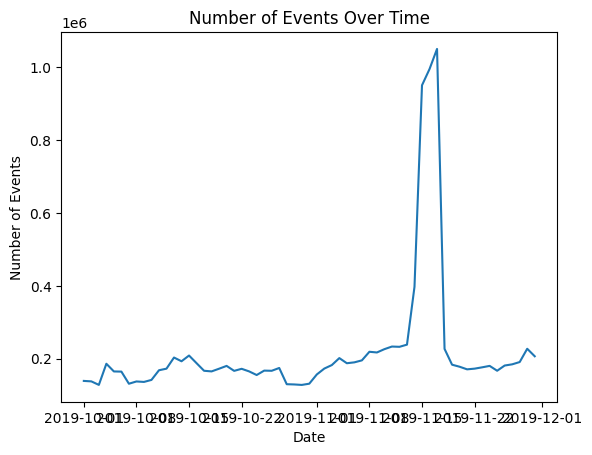

In [32]:
# Example EDA: distribution of product prices
import matplotlib.pyplot as plt

combined_df['price'].hist(bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices in Appliances Category')
plt.show()

# Example EDA: count of events over time
combined_df['event_time'] = pd.to_datetime(combined_df['event_time'])
combined_df['event_time'].dt.date.value_counts().sort_index().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.title('Number of Events Over Time')
plt.show()

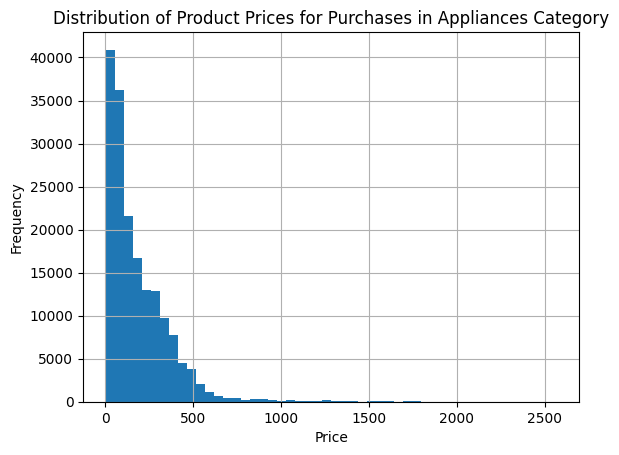

<ipython-input-33-7b7ace580ea5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['event_time'] = pd.to_datetime(purchases['event_time'])


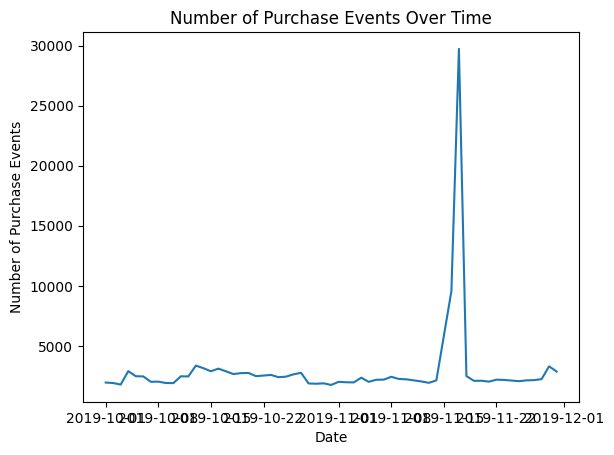

In [33]:
# Separate data by event type
views = combined_df[combined_df['event_type'] == 'view']
add_to_cart = combined_df[combined_df['event_type'] == 'cart']
purchases = combined_df[combined_df['event_type'] == 'purchase']

# EDA: Distribution of product prices for purchases
purchases['price'].hist(bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices for Purchases in Appliances Category')
plt.show()

# EDA: Count of purchase events over time
purchases['event_time'] = pd.to_datetime(purchases['event_time'])
purchases['event_time'].dt.date.value_counts().sort_index().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Purchase Events')
plt.title('Number of Purchase Events Over Time')
plt.show()

<ipython-input-34-6146418986f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['event_time'] = pd.to_datetime(purchases['event_time'])
<ipython-input-34-6146418986f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['hour'] = purchases['event_time'].dt.hour


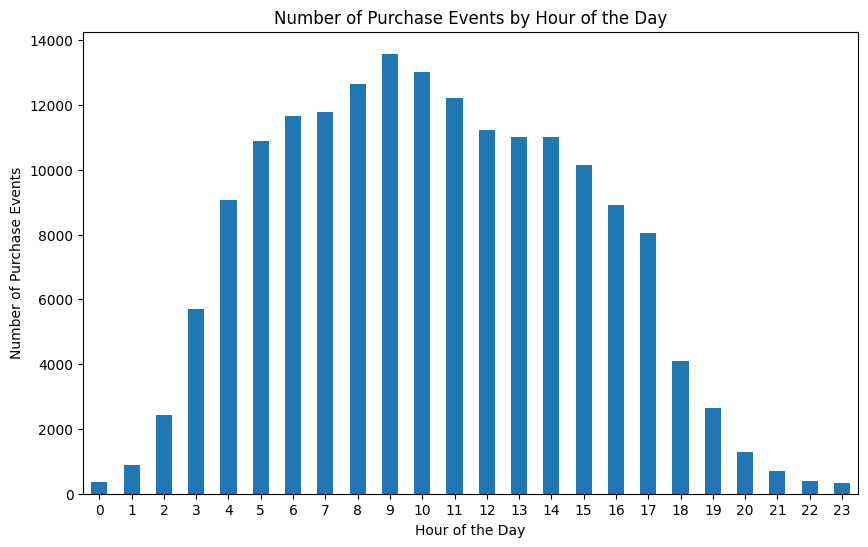

In [34]:
# Assuming purchases DataFrame is already created and cleaned
purchases['event_time'] = pd.to_datetime(purchases['event_time'])
purchases['hour'] = purchases['event_time'].dt.hour

# Count the number of purchases by hour
hourly_purchase_counts = purchases['hour'].value_counts().sort_index()

# Plot the number of purchase events over the hours of the day
plt.figure(figsize=(10, 6))
hourly_purchase_counts.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Purchase Events')
plt.title('Number of Purchase Events by Hour of the Day')
plt.xticks(rotation=0)
plt.show()


In [37]:
appliances_df['event_time'] = pd.to_datetime(appliances_df['event_time'])

In [38]:

# Separate data by event type
views = appliances_df[appliances_df['event_type'] == 'view']
add_to_cart = appliances_df[appliances_df['event_type'] == 'cart']
purchases = appliances_df[appliances_df['event_type'] == 'purchase']


In [39]:
purchases['event_time'] = pd.to_datetime(purchases['event_time'])

<ipython-input-39-abc78034102a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['event_time'] = pd.to_datetime(purchases['event_time'])


In [40]:
purchases['hour'] = purchases['event_time'].dt.hour
purchases['day_of_week'] = purchases['event_time'].dt.dayofweek

<ipython-input-40-e2d22c8e2515>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['hour'] = purchases['event_time'].dt.hour
<ipython-input-40-e2d22c8e2515>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['day_of_week'] = purchases['event_time'].dt.dayofweek


In [41]:
hourly_sales = purchases.groupby('hour').size()
daily_sales = purchases.groupby('day_of_week').size()

In [42]:
co_purchase = purchases.groupby('user_session')['product_id'].apply(lambda x: list(x))

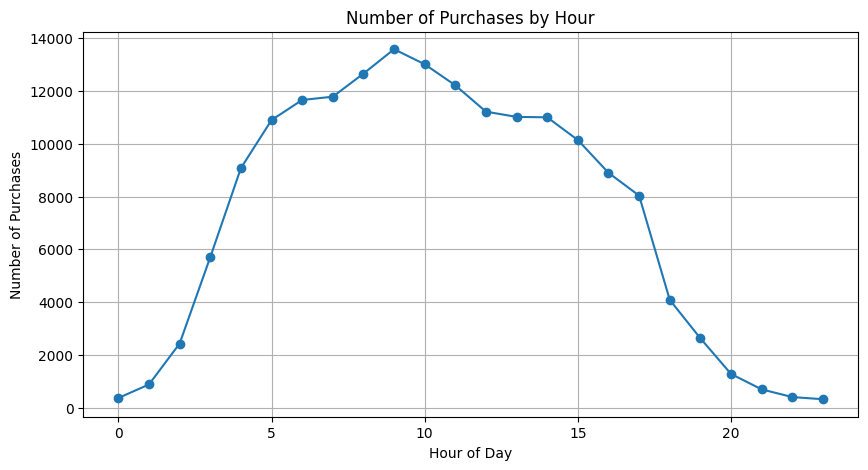

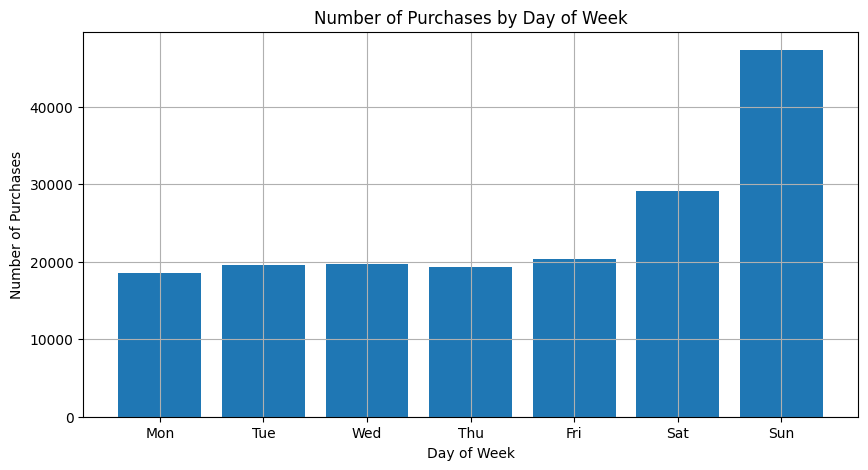

In [43]:


plt.figure(figsize=(10, 5))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o')
plt.title('Number of Purchases by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(daily_sales.index, daily_sales.values)
plt.title('Number of Purchases by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Purchases')
plt.xticks(daily_sales.index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid()
plt.show()

In [44]:
print(co_purchase.head())

user_session
0000be48-eb0e-43e6-8b78-25f8bd078926    [3900686]
00012854-9b58-45b6-af66-d61a0039530f    [3701056]
00027924-8be6-46cb-a497-150fec7789df    [2900958]
0002aaf2-77fd-4cbb-98bb-bbeedf076d90    [2700344]
0002f017-b528-4b9d-92ad-de2354c118c2    [3100640]
Name: product_id, dtype: object


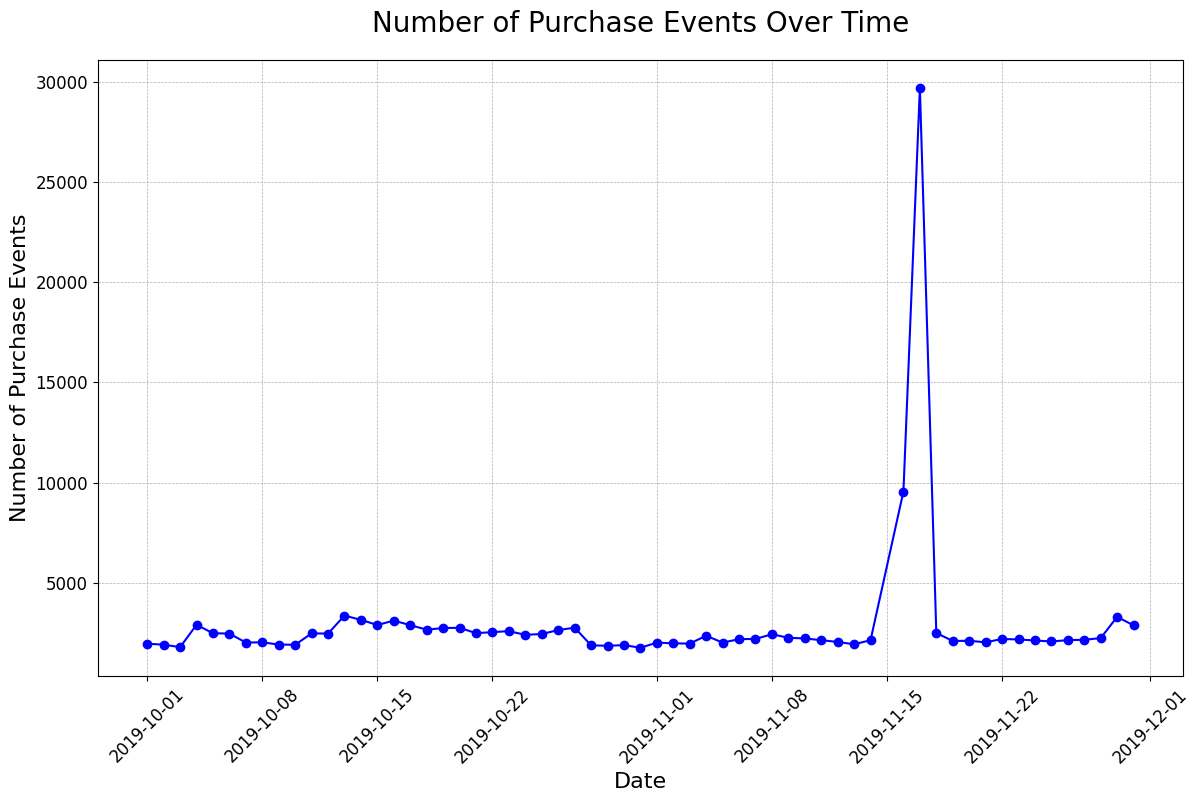

In [45]:
purchase_counts = purchases['event_time'].dt.date.value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(14, 8))
plt.plot(purchase_counts.index, purchase_counts.values, marker='o', linestyle='-', color='b')

# Customizing the plot
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Purchase Events', fontsize=16)
plt.title('Number of Purchase Events Over Time', fontsize=20, pad=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


In [46]:
import pandas as pd

# Assuming purchases_df is already loaded and filtered for purchases

# Step 1: Check the number of products per session
product_counts_per_session = purchases.groupby('user_session')['product_id'].count()

# Filter sessions with more than one product
multi_product_sessions = product_counts_per_session[product_counts_per_session > 1]
print("Number of sessions with multiple products:", multi_product_sessions.count())

# Display some examples of sessions with multiple products
example_sessions = multi_product_sessions.index[:5]
print(purchases[purchases['user_session'].isin(example_sessions)])


Number of sessions with multiple products: 14041
                        event_time event_type  product_id  \
417521   2019-10-04 03:50:08+00:00   purchase     2500566   
417849   2019-10-04 03:52:47+00:00   purchase     3200137   
1435683  2019-10-10 16:27:31+00:00   purchase     3600666   
1435999  2019-10-10 16:29:14+00:00   purchase     3600666   
1522319  2019-10-11 08:39:44+00:00   purchase     3800819   
1522553  2019-10-11 08:41:14+00:00   purchase     3800819   
7247649  2019-11-12 10:29:02+00:00   purchase     2701305   
7248871  2019-11-12 10:35:19+00:00   purchase     3601535   
10582050 2019-11-17 12:36:20+00:00   purchase     3801211   
10585689 2019-11-17 12:39:04+00:00   purchase     3701134   

                  category_id                     category_code    brand  \
417521    2053013564003713919           appliances.kitchen.oven     asel   
417849    2053013555321504139   appliances.kitchen.meat_grinder      NaN   
1435683   2053013563810775923         appliances.ki

In [47]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Display the number of sessions with multiple products
print("Number of sessions with multiple products:", multi_product_sessions.count())

Number of sessions with multiple products: 14041


In [48]:
# Step 3: Filter purchases_df to only include sessions with multiple products
multi_product_purchases = purchases[purchases['user_session'].isin(multi_product_sessions.index)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
# Step 4: Group products by session
transactions = multi_product_purchases.groupby('user_session')['product_id'].apply(list)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
from sklearn.preprocessing import MultiLabelBinarizer

# Step 5: One-Hot Encode
mlb = MultiLabelBinarizer()
one_hot_encoded = pd.DataFrame(mlb.fit_transform(transactions), columns=mlb.classes_, index=transactions.index)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
# Step 6: Apply the Apriori algorithm
frequent_itemsets = apriori(one_hot_encoded, min_support=0.01, use_colnames=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [52]:
# Step 7: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display some rules
print(rules.head())


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
# Step 6: Apply the Apriori algorithm
frequent_itemsets = apriori(one_hot_encoded, min_support=0.01, use_colnames=True)

# Check frequent itemsets
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support   itemsets
0   0.012107  (2702277)
1   0.012250  (2900958)
2   0.020013  (3600163)
3   0.032832  (3600661)
4   0.021793  (3600666)
5   0.022648  (3601405)
6   0.010968  (3601437)
7   0.011466  (3601485)
8   0.010184  (3601524)
9   0.010683  (3601603)
10  0.012891  (3700766)
11  0.025354  (3700926)


In [54]:
# Step 6: Apply the Apriori algorithm with lower min_support
frequent_itemsets = apriori(one_hot_encoded, min_support=0.005, use_colnames=True)

# Debug: Check frequent itemsets
print(frequent_itemsets)

# Step 7: Generate association rules with a lower lift threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)

# If rules are still empty, try confidence threshold
if rules.empty:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Display some rules
print(rules)
print(rules.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     support    itemsets
0   0.007051   (2500566)
1   0.005982   (2501799)
2   0.005057   (2700598)
3   0.005199   (2701639)
4   0.007122   (2701646)
5   0.009330   (2701657)
6   0.009045   (2701683)
7   0.012107   (2702277)
8   0.005128   (2702331)
9   0.006623   (2702347)
10  0.006054   (2900090)
11  0.007834   (2900536)
12  0.005341   (2900569)
13  0.012250   (2900958)
14  0.020013   (3600163)
15  0.009259   (3600182)
16  0.007193   (3600231)
17  0.005769   (3600253)
18  0.032832   (3600661)
19  0.021793   (3600666)
20  0.006695   (3601244)
21  0.006267   (3601250)
22  0.007407   (3601343)
23  0.022648   (3601405)
24  0.006837   (3601425)
25  0.010968   (3601437)
26  0.008262   (3601438)
27  0.006125   (3601448)
28  0.011466   (3601485)
29  0.009045   (3601489)
30  0.006980   (3601505)
31  0.006267   (3601522)
32  0.010184   (3601524)
33  0.010683   (3601603)
34  0.006481   (3700621)
35  0.007478   (3700748)
36  0.012891   (3700766)
37  0.005626   (3700869)
38  0.005698   (3700912)


In [55]:
frequent_itemsets = apriori(one_hot_encoded, min_support=0.005, use_colnames=True)

# Debug: Check frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Step 7: Generate association rules with lower lift threshold
rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
print("Rules based on lift:")
print(rules_lift)

# Step 8: Generate association rules with lower confidence threshold
rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print("Rules based on confidence:")
print(rules_confidence)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
     support    itemsets
0   0.007051   (2500566)
1   0.005982   (2501799)
2   0.005057   (2700598)
3   0.005199   (2701639)
4   0.007122   (2701646)
5   0.009330   (2701657)
6   0.009045   (2701683)
7   0.012107   (2702277)
8   0.005128   (2702331)
9   0.006623   (2702347)
10  0.006054   (2900090)
11  0.007834   (2900536)
12  0.005341   (2900569)
13  0.012250   (2900958)
14  0.020013   (3600163)
15  0.009259   (3600182)
16  0.007193   (3600231)
17  0.005769   (3600253)
18  0.032832   (3600661)
19  0.021793   (3600666)
20  0.006695   (3601244)
21  0.006267   (3601250)
22  0.007407   (3601343)
23  0.022648   (3601405)
24  0.006837   (3601425)
25  0.010968   (3601437)
26  0.008262   (3601438)
27  0.006125   (3601448)
28  0.011466   (3601485)
29  0.009045   (3601489)
30  0.006980   (3601505)
31  0.006267   (3601522)
32  0.010184   (3601524)
33  0.010683   (3601603)
34  0.006481   (3700621)
35  0.007478   (3700748)
36  0.012891   (3700766)
37  0.005626   (3700869)
38  0.

In [56]:
purchases.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,hour,day_of_week
97,2019-10-01 00:10:56+00:00,purchase,6200687,2053013552293216471,appliances.environment.air_heater,oasis,28.03,548691404,b67cdbcb-b073-4271-b365-803c6fce53b0,0,1
547,2019-10-01 02:29:01+00:00,purchase,3200361,2053013555321504139,appliances.kitchen.meat_grinder,philips,120.95,553819262,94b897fc-80c6-492c-a456-707398c7cc8e,2,1
663,2019-10-01 02:30:46+00:00,purchase,3100152,2053013555262783879,appliances.kitchen.blender,panasonic,51.46,527681026,feb31d4f-ceb5-4710-8a8e-391abeaca106,2,1
921,2019-10-01 02:34:23+00:00,purchase,3601485,2053013563810775923,appliances.kitchen.washer,lg,308.65,513419646,5e227e58-6117-419c-b45d-ac54be44716d,2,1
940,2019-10-01 02:34:45+00:00,purchase,3700127,2053013565983425517,appliances.environment.vacuum,lg,189.26,512584306,510447fa-8dee-4027-a80a-a17dab9260af,2,1


In [57]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import MultiLabelBinarizer

# Assuming purchases_df is already loaded and filtered for purchases

# Step 1: Check the number of products per session
product_counts_per_session = purchases.groupby('user_session')['product_id'].count()

# Step 2: Filter sessions with more than one product
multi_product_sessions = product_counts_per_session[product_counts_per_session > 1]

# Step 3: Filter purchases_df to only include sessions with multiple products
multi_product_purchases = purchases[purchases['user_session'].isin(multi_product_sessions.index)]

# Step 4: Group products by session
transactions = multi_product_purchases.groupby('user_session')['product_id'].apply(list)

# Step 5: One-Hot Encode
mlb = MultiLabelBinarizer()
one_hot_encoded = pd.DataFrame(mlb.fit_transform(transactions), columns=mlb.classes_, index=transactions.index)

# Step 6: Apply the Apriori algorithm with lower min_support
frequent_itemsets = apriori(one_hot_encoded, min_support=0.005, use_colnames=True)

# Debug: Check frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Check the length of itemsets
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
print("Frequent Itemsets with Lengths:")
print(frequent_itemsets)

# Step 7: Generate association rules with lower lift threshold
rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
print("Rules based on lift:")
print(rules_lift)

# Step 8: Generate association rules with lower confidence threshold
rules_confidence = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print("Rules based on confidence:")
print(rules_confidence)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
     support    itemsets
0   0.007051   (2500566)
1   0.005982   (2501799)
2   0.005057   (2700598)
3   0.005199   (2701639)
4   0.007122   (2701646)
5   0.009330   (2701657)
6   0.009045   (2701683)
7   0.012107   (2702277)
8   0.005128   (2702331)
9   0.006623   (2702347)
10  0.006054   (2900090)
11  0.007834   (2900536)
12  0.005341   (2900569)
13  0.012250   (2900958)
14  0.020013   (3600163)
15  0.009259   (3600182)
16  0.007193   (3600231)
17  0.005769   (3600253)
18  0.032832   (3600661)
19  0.021793   (3600666)
20  0.006695   (3601244)
21  0.006267   (3601250)
22  0.007407   (3601343)
23  0.022648   (3601405)
24  0.006837   (3601425)
25  0.010968   (3601437)
26  0.008262   (3601438)
27  0.006125   (3601448)
28  0.011466   (3601485)
29  0.009045   (3601489)
30  0.006980   (3601505)
31  0.006267   (3601522)
32  0.010184   (3601524)
33  0.010683   (3601603)
34  0.006481   (3700621)
35  0.007478   (3700748)
36  0.012891   (3700766)
37  0.005626   (3700869)
38  0.

In [58]:
multi_product_sessions.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


user_session
0008ac1c-0940-4a0f-b4d0-a690c249552c    2
001283a2-d6de-49cc-9003-ee96689fa785    2
00138a81-c07f-44a5-b087-a62c25d7e2d6    2
0016f0d4-d247-4dd4-9536-ba1350ba367c    2
0027145b-3706-4063-8615-7d718edfb84a    2
Name: product_id, dtype: int64

In [59]:
# Filter purchases_df to only include sessions with multiple products
multi_product_purchases = purchases[purchases['user_session'].isin(multi_product_sessions.index)]

# Group products by session
transactions = multi_product_purchases.groupby('user_session')['product_id'].apply(list)

# One-Hot Encode
mlb = MultiLabelBinarizer()
one_hot_encoded = pd.DataFrame(mlb.fit_transform(transactions), columns=mlb.classes_, index=transactions.index)

# Check the first few rows of one-hot encoded data
print(one_hot_encoded.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                      2400054    2400114    2400163    \
user_session                                                            
0008ac1c-0940-4a0f-b4d0-a690c249552c          0          0          0   
001283a2-d6de-49cc-9003-ee96689fa785          0          0          0   
00138a81-c07f-44a5-b087-a62c25d7e2d6          0          0          0   
0016f0d4-d247-4dd4-9536-ba1350ba367c          0          0          0   
0027145b-3706-4063-8615-7d718edfb84a          0          0          0   

                                      2400194    2400216    2400222    \
user_session                                                            
0008ac1c-0940-4a0f-b4d0-a690c249552c          0          0          0   
001283a2-d6de-49cc-9003-ee96689fa785          0          0          0   
00138a81-c07f-44a5-b087-a62c25d7e2d6          0          0          0   
0016f0d4-d247-4dd4-9536-ba1350ba367c          0          0          0   
0027145b-3706-4063-8615-7d718edfb84a          0   

In [61]:
from itertools import combinations

# Check the number of products per session
product_counts_per_session = purchases.groupby('user_session')['product_id'].count()

# Filter sessions with more than one product
multi_product_sessions = product_counts_per_session[product_counts_per_session > 1]

# Filter purchases DataFrame to only include sessions with multiple products
multi_product_purchases = purchases[purchases['user_session'].isin(multi_product_sessions.index)]

# Group products by session
transactions = multi_product_purchases.groupby('user_session')['product_id'].apply(list)

# Generate pairs of co-purchased products (excluding pairs of the same product)
pairs = []
for transaction in transactions:
    if len(transaction) > 1:
        pairs.extend([tuple(sorted(pair)) for pair in combinations(transaction, 2) if pair[0] != pair[1]])

# Display first 10 pairs for verification
print("First 10 pairs of co-purchased products:")
print(pairs[:10])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


First 10 pairs of co-purchased products:
[(2701305, 3601535), (3701134, 3801211), (2500566, 3200137), (3601522, 4201541), (3701005, 3701016), (2900569, 6300687), (2500859, 4500301), (2900200, 3700926), (3800979, 6300465), (2501143, 2501244)]


In [63]:
from collections import Counter
# Count the frequency of each pair
pair_counts = Counter(pairs)

# Convert to a DataFrame for easier analysis
pair_counts_df = pd.DataFrame(pair_counts.items(), columns=['pair', 'count'])
pair_counts_df = pair_counts_df.sort_values(by='count', ascending=False)

# Display the most common co-purchases of different products
print("Most common co-purchases of different products:")
print(pair_counts_df.head(30))


Most common co-purchases of different products:
                    pair  count
1119  (2702331, 2702347)    204
369   (3600163, 3601405)     48
91    (3600661, 3600666)     40
4341  (3601124, 3601522)     32
2856  (2702347, 3601485)     32
730   (3600661, 3601405)     31
560   (2702347, 3600661)     30
2857  (2702331, 3601485)     25
492   (3600666, 3601524)     24
1835  (3601405, 3601438)     23
898   (3600163, 3600661)     23
2465  (2701639, 2701646)     18
4653  (2702331, 3600661)     18
465   (2702331, 4201541)     18
755   (2702347, 4201541)     18
1369  (3600661, 3601485)     17
5373  (3601438, 3601508)     17
719   (3600666, 3601405)     17
178   (3600231, 3600253)     16
6210  (3600898, 3601005)     16
1844  (2701646, 2701647)     16
1376  (4201530, 4201541)     16
7170  (3700926, 3900815)     15
4814  (2702347, 3601603)     15
32    (3601603, 3601605)     15
1122  (3700627, 4600591)     15
2555  (3600661, 3601524)     15
4815  (2702347, 3600263)     15
3105  (3700926, 3701056)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
def recommend_products(product_id, pair_counts_df, top_n=5):
    """
    Recommend top_n products that are most frequently bought with the given product_id.

    :param product_id: ID of the product to base recommendations on
    :param pair_counts_df: DataFrame containing pairs of co-purchased products and their counts
    :param top_n: Number of recommendations to return
    :return: List of recommended product IDs
    """
    # Find all pairs involving the given product_id
    recommendations = pair_counts_df[pair_counts_df['pair'].apply(lambda x: product_id in x)]

    # Extract the other product in the pair and sort by count
    recommendations['recommended_product'] = recommendations['pair'].apply(
        lambda x: x[1] if x[0] == product_id else x[0])
    recommendations = recommendations.sort_values(by='count', ascending=False)

    # Return the top_n recommended products
    return recommendations['recommended_product'].head(top_n).tolist()

# Example usage:
product_id = 3600661
recommended_products = recommend_products(product_id, pair_counts_df)
print(f"Products commonly bought with product {product_id}: {recommended_products}")


Products commonly bought with product 3600661: [3600666, 3601405, 2702347, 3600163, 2702331]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-64-bc39fc30cd53>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendations['recommended_product'] = recommendations['pair'].apply(


In [65]:
def recommend_products(product_id, pair_counts_df, top_n=5):
    """
    Recommend top_n products that are most frequently bought with the given product_id.

    :param product_id: ID of the product to base recommendations on
    :param pair_counts_df: DataFrame containing pairs of co-purchased products and their counts
    :param top_n: Number of recommendations to return
    :return: List of recommended product IDs
    """
    # Find all pairs involving the given product_id
    recommendations = pair_counts_df[pair_counts_df['pair'].apply(lambda x: product_id in x)]

    # Extract the other product in the pair and sort by count
    recommendations['recommended_product'] = recommendations['pair'].apply(
        lambda x: x[1] if x[0] == product_id else x[0])
    recommendations = recommendations.sort_values(by='count', ascending=False)

    # Return the top_n recommended products
    return recommendations['recommended_product'].head(top_n).tolist()

# Generate co-purchase recommendations for each unique product in the dataset
unique_products = purchases['product_id'].unique()
co_purchase_recommendations = {product_id: recommend_products(product_id, pair_counts_df) for product_id in unique_products}


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendations['recommended_product'] = recommendations['pair'].apply(
<ipython-input-65-bd2cf017e5b7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendations['recommended_product'] = recommendations['pair'].apply(
<ipython-input-65-bd2cf017e5b7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendati

In [66]:
# Function to get co-purchases for a product ID
def get_recommendations(product_id):
    return co_purchase_recommendations.get(product_id, [])

# Add a new column 'co_purchases' to the original DataFrame
purchases['co_purchases'] = purchases['product_id'].apply(get_recommendations)

# Display the updated DataFrame
print("Updated purchases_df with co-purchases:")
print(purchases.head())


Updated purchases_df with co-purchases:
                   event_time event_type  product_id          category_id  \
97  2019-10-01 00:10:56+00:00   purchase     6200687  2053013552293216471   
547 2019-10-01 02:29:01+00:00   purchase     3200361  2053013555321504139   
663 2019-10-01 02:30:46+00:00   purchase     3100152  2053013555262783879   
921 2019-10-01 02:34:23+00:00   purchase     3601485  2053013563810775923   
940 2019-10-01 02:34:45+00:00   purchase     3700127  2053013565983425517   

                         category_code      brand   price    user_id  \
97   appliances.environment.air_heater      oasis   28.03  548691404   
547    appliances.kitchen.meat_grinder    philips  120.95  553819262   
663         appliances.kitchen.blender  panasonic   51.46  527681026   
921          appliances.kitchen.washer         lg  308.65  513419646   
940      appliances.environment.vacuum         lg  189.26  512584306   

                             user_session  hour  day_of_week  \


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-66-63d0ab64dc61>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['co_purchases'] = purchases['product_id'].apply(get_recommendations)


In [68]:
# Save the updated DataFrame to a CSV file
file_path = 'Final_df.csv'
purchases.to_csv(file_path, index=False)
print(f"DataFrame saved to {file_path}")
from google.colab import files
files.download(file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DataFrame saved to Final_df.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>